## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [4]:
a= -2
b =1
x_i =np.linspace(0, 20)
y_i = a * x_i + b 
print(x_i)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]


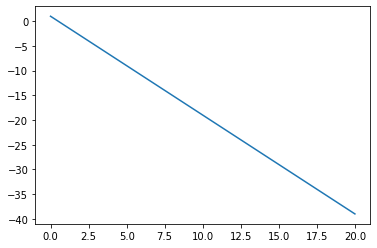

In [5]:
plt.plot(x_i,y_i)

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

4156


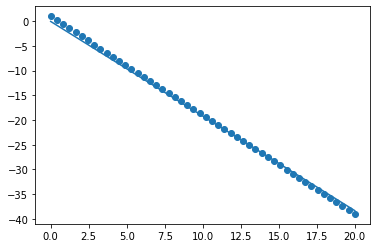

-0.03873088417839249
-1.9154682379167436


In [29]:
#Full implemintion Batch
import numpy as np
import matplotlib.pyplot as plt
cost_all=[0]
theta0_all=[]
theta1_all=[]
def cost(theta0,theta1,x_points,y_points):
    
    m=len(x_points)
    h=(theta0+x_points*theta1)
    
    error=  sum((h-y_points)**2)
    return  error/(2*m ) 
    
def difft0(theta0,theta1,x_points,y_points):
    m=len(x_points)
    error= sum((theta0+x_points*theta1)-y_points)
    return  error/m  

def difft1(theta0,theta1,x_points,y_points):
    error = 0
    m=len(x_points)
    error=  sum(((theta0+x_points*theta1)-y_points) * x_points)
    return  error/m  
def fit(x_points,y_points,initial_value,alpha,numOfItr):
    theta0=theta1=initial_value
    theta0_all.append(theta0)
    theta1_all.append(theta1)
    for i in range(numOfItr):
        j= cost(theta0,theta1,x_points,y_points)
        dt0 = difft0(theta0,theta1,x_points,y_points)
        dt1 = difft1(theta0,theta1,x_points,y_points)
        theta0 = theta0 - alpha*dt0
        theta1 = theta1 - alpha*dt1
        if abs(dt0)<0.00001 and abs(dt1)<0.00001:
            break
        elif abs(theta0_all[i]-theta0)<0.00001 and abs(theta1_all[i]-theta1)<0.00001:
            print(i)

            break
        cost_all.append(j)
        theta0_all.append(theta0)
        theta1_all.append(theta1)
    return theta0,theta1




alpha = 0.00001
theta0 , theta1 =fit(x_i,y_i,0.1,alpha,100000)
plt.scatter(x_i, y_i)
y_pred=[]

y_pred=theta0+theta1*x_i


plt.plot(x_i,y_pred )

plt.show()

print(theta0)
print(theta1)

#### Try your function with any input parameterss of your choice.

#### Calculate r2 score

In [30]:
from sklearn.metrics import r2_score
r2_score(y_i,y_pred)

0.9979440326775005

In [31]:
len(theta0_all)

4157

In [32]:
len(cost_all)

4157

#### Plot loss vs. epochs

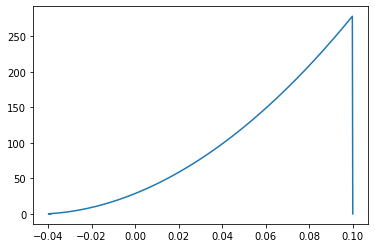

In [33]:
plt.plot(theta0_all,cost_all)


#### Plot Theta_0 vs. loss and Theta_1 vs. loss

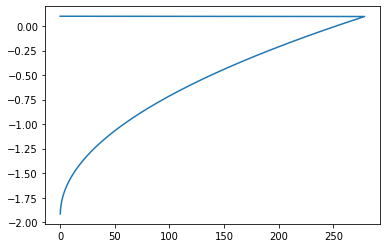

In [34]:
plt.plot(cost_all,theta1_all)

#### Plot all regression lines till converge

#### Plot the best regression line

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [43]:
import matplotlib.pyplot as plt
import random
a= -2
b =1
x_i =np.linspace(0, 20)
random.shuffle(x_i)
y_i = a * x_i + b 
print(len(x_i))

50


In [44]:
y_i

array([-12.06122449, -21.85714286, -14.51020408, -17.7755102 ,
       -19.40816327, -32.46938776, -30.83673469,  -4.71428571,
         1.        , -15.32653061, -27.57142857, -28.3877551 ,
        -2.26530612, -21.04081633, -13.69387755, -11.24489796,
       -10.42857143, -12.87755102,  -3.89795918, -25.93877551,
       -36.55102041,  -5.53061224, -16.95918367,   0.18367347,
       -30.02040816, -18.59183673, -35.73469388,  -6.34693878,
        -3.08163265,  -7.97959184, -37.36734694, -23.48979592,
       -33.28571429, -39.        ,  -7.16326531, -34.10204082,
       -25.12244898, -38.18367347, -31.65306122, -29.20408163,
       -16.14285714,  -0.63265306, -22.67346939,  -1.44897959,
       -24.30612245,  -8.79591837,  -9.6122449 , -34.91836735,
       -26.75510204, -20.2244898 ])

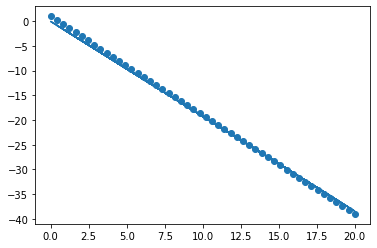

-0.03705346281626052
-1.9206796386342324


In [45]:
#Full implemintion Batch
import numpy as np
import matplotlib.pyplot as plt
cost_all=[0]
theta0_all=[]
theta1_all=[]
def cost(theta0,theta1,x_points,y_points):
    
    m=len(x_points)
    h=(theta0+x_points*theta1)
    
    error=  sum((h-y_points)**2)
    return  error/(2*m ) 
    
def difft0(theta0,theta1,x_points,y_points):
    m=len(x_points)
    error= sum((theta0+x_points*theta1)-y_points)
    return  error/m  

def difft1(theta0,theta1,x_points,y_points):
    error = 0
    m=len(x_points)
    error=  sum(((theta0+x_points*theta1)-y_points) * x_points)
    return  error/m  
def fit(x_points,y_points,initial_value,alpha,numOfItr):
    theta0=theta1=initial_value
    theta0_all.append(theta0)
    theta1_all.append(theta1)
    for i in range(numOfItr):
        for j in range(0,len(x_points)):
               cost_all.append( cost(theta0,theta1,x_points[j:j+1],y_points[j:j+1]))
               dt0 = difft0(theta0,theta1,x_points[j:j+1],y_points[j:j+1])
               dt1 = difft1(theta0,theta1,x_points[j:j+1],y_points[j:j+1])
               theta0 = theta0 - alpha*dt0
               theta1 = theta1 - alpha*dt1
               theta0_all.append(theta0)
               theta1_all.append(theta1)
    return theta0,theta1




alpha = 0.00001
theta0 , theta1 =fit(x_i,y_i,0.1,alpha,100)
plt.scatter(x_i, y_i)
y_pred=[]

y_pred=theta0+theta1*x_i


plt.plot(x_i,y_pred )

plt.show()

print(theta0)
print(theta1)

In [46]:
from sklearn.metrics import r2_score
r2_score(y_i,y_pred)

0.9979985884949953

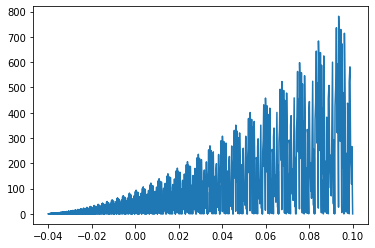

In [47]:
plt.plot(theta0_all,cost_all)

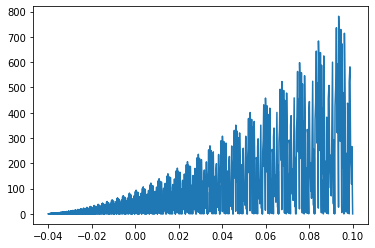

In [48]:
plt.plot(theta0_all,cost_all)

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

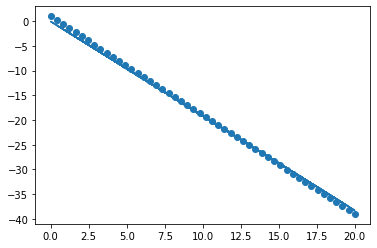

-0.04512561072455851
-1.9124207785348892


In [49]:
#Full implemintion Batch
import numpy as np
import matplotlib.pyplot as plt
cost_all=[0]
theta0_all=[]
theta1_all=[]
def cost(theta0,theta1,x_points,y_points):
    
    m=len(x_points)
    h=(theta0+x_points*theta1)
    
    error=  sum((h-y_points)**2)
    return  error/(2*m ) 
    
def difft0(theta0,theta1,x_points,y_points):
    m=len(x_points)
    error= sum((theta0+x_points*theta1)-y_points)
    return  error/m  

def difft1(theta0,theta1,x_points,y_points):
    error = 0
    m=len(x_points)
    error=  sum(((theta0+x_points*theta1)-y_points) * x_points)
    return  error/m  
def fit(x_points,y_points,initial_value,alpha,batch_num,numOfItr):
    theta0=theta1=initial_value
    theta0_all.append(theta0)
    theta1_all.append(theta1)
    mini=len(x_points)//batch_num
    remender=len(y_points)%batch_num
    for i in range(numOfItr):
        for j in range(0,len(x_points),mini):
            if(j+mini+remender !=len(y_points)):
               cost_all.append( cost(theta0,theta1,x_points[j:j+mini],y_points[j:j+mini]))
               dt0 = difft0(theta0,theta1,x_points[j:j+mini],y_points[j:j+mini])
               dt1 = difft1(theta0,theta1,x_points[j:j+mini],y_points[j:j+mini])
               theta0 = theta0 - alpha*dt0
               theta1 = theta1 - alpha*dt1
               theta0_all.append(theta0)
               theta1_all.append(theta1)
               
            else:
               cost_all.append( cost(theta0,theta1,x_points[j:len(x_points)],y_points[j:len(x_points)]))
               dt0 = difft0(theta0,theta1,x_points[j:len(x_points)],y_points[j:len(x_points)])
               dt1 = difft1(theta0,theta1,x_points[j:len(x_points)],y_points[j:len(x_points)])
               theta0 = theta0 - alpha*dt0
               theta1 = theta1 - alpha*dt1
               theta0_all.append(theta0)
               theta1_all.append(theta1)
              
        
    return theta0,theta1




alpha = 0.00001
batch_num=3
theta0 , theta1 =fit(x_i,y_i,0.1,alpha,batch_num,1000)
plt.scatter(x_i, y_i)
y_pred=[]

y_pred=theta0+theta1*x_i


plt.plot(x_i,y_pred )

plt.show()

print(theta0)
print(theta1)

In [50]:
from sklearn.metrics import r2_score
r2_score(y_i,y_pred)

0.9978758499694997

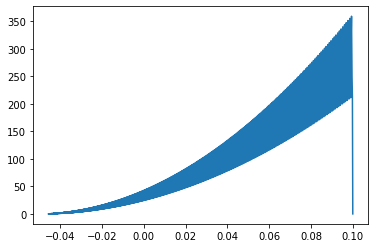

In [51]:
plt.plot(theta0_all,cost_all)

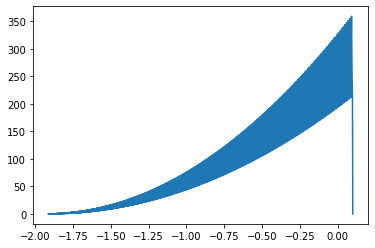

In [52]:
plt.plot(theta1_all,cost_all)

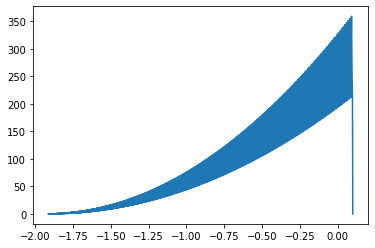

In [54]:
plt.plot(theta1_all,cost_all)